# 机器学习的四个分支

## 监督学习

## 无监督学习

## 自监督学习

## 强化学习

# 评估机器学习模型

## 训练集、验证集和测试集

In [1]:
# num_validation_samples=10000

# # 通常需要打乱数据
# np.random.shuffle(data)

# # 定义验证集
# validation_data=data[:num_validation_samples]
# data=data[num_validation_samples:]

# # 定义训练集
# training_data=data[:]

# # 在训练数据上训练模型
# model=get_model()
# # 并在验证数据上评估模型
# model.train(training_data)
# validation_score=model.evaluate(validation_data)

# # 现在你可以调节模型、重新训练、评估，然后再次调节...

# # 一旦调节好了超参数，通常就在所有非测试数据上从头开始训练最终模型
# model=get_model()
# model.train(np.concatenate([training_data,
#                            validation_data]))
# test_score=model.evaluate(test_score)

In [2]:
# k=4
# num_validation_samples=len(data)//k

# np.random.shuffle(data)

# validation_scores=[]
# for fold in range(k):
#     # 选择验证数据分区
#     validation_data=data[num_validation_samples*fold:num_validation_samples*(fold+1)]
#     # 使用剩余数据作为训练数据，注意，+运算符是列表合并，并不是求和
#     training_data=data[:num_validation_samples*fold]+data[num_validation_samples*(fold+1):]
    
#     # 创建一个全新的模型
#     model=get_model()
#     model.train(training_data)
#     validation_score=model.evaluate(validation_data)
#     validation_scores.append(validation_score)
    
# # 最终验证分数：K折验证分数的平均值
# validation_scorea=np.average(validation_scoresa)

# # 在所有非测试数据上训练最终模型
# model=get_model()
# model.train(data)
# test_score=model.evaluate(test_score)

## 评估模型的注意事项

# 数据预处理、特征工程和特征学习

## 神经网络的数据预处理

In [3]:
# # 假设x是一个形状为(samples,features)的二维矩阵
# x-=x.mean(axis=0)
# x/=x.std(axis=0)

## 特征工程

# 过拟合和欠拟合

## 减小网络大小

In [4]:
# 载入第三章电影评论分类的网络数据
from keras.datasets import imdb
import numpy as np

(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

def vectorize_sequences(sequences,dimension=10000):
    # 创建一个形状为(len(sequences),dimension)的零矩阵
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        # 将result[i]的指定索引设为1
        results[i,sequence]=1.
    return results

# 将训练数据向量化
x_train=vectorize_sequences(train_data)
# 将测试数据向量化
x_test=vectorize_sequences(test_data)

y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')


x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [5]:
# 原始模型
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

original_history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

original_history_dict=original_history.history

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.5121 - accuracy: 0.7936 - val_loss: 0.4430 - val_accuracy: 0.8102
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3142 - accuracy: 0.9025 - val_loss: 0.3151 - val_accuracy: 0.8816
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2312 - accuracy: 0.9243 - val_loss: 0.2812 - val_accuracy: 0.8890
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1787 - accuracy: 0.9406 - val_loss: 0.2947 - val_accuracy: 0.8817
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1449 - accuracy: 0.9543 - val_loss: 0.2806 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1183 - accuracy: 0.9644 - val_loss: 0.3026 - val_accuracy: 0.8826
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0990 - accuracy: 0.9703 - val_loss: 0.3116 - val_accuracy: 0.8828
Epoch 8/20
30

limit_output extension: Maximum message size of 10000 exceeded with 10143 characters

In [6]:
# 容量更小的模型
model=models.Sequential()
model.add(layers.Dense(4,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

smaller_history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

smaller_history_dict=smaller_history.history

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.6019 - accuracy: 0.6567 - val_loss: 0.5464 - val_accuracy: 0.7223
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4936 - accuracy: 0.8304 - val_loss: 0.4946 - val_accuracy: 0.8293
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4399 - accuracy: 0.8848 - val_loss: 0.4844 - val_accuracy: 0.8076
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4010 - accuracy: 0.9135 - val_loss: 0.4537 - val_accuracy: 0.8491
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3684 - accuracy: 0.9319 - val_loss: 0.4291 - val_accuracy: 0.8837
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3399 - accuracy: 0.9473 - val_loss: 0.4157 - val_accuracy: 0.8800
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3125 - accuracy: 0.9564 - val_loss: 0.4238 - val_accuracy: 0.8631
Epoch 8/20
30

limit_output extension: Maximum message size of 10000 exceeded with 10143 characters

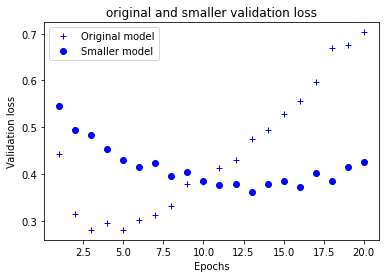

In [7]:
import matplotlib.pyplot as plt

original_val_loss_values=original_history_dict['val_loss']
smaller_val_loss_values=smaller_history_dict['val_loss']

epochs=range(1,len(original_val_loss_values)+1)

plt.plot(epochs,original_val_loss_values,'b+',label='Original model')
plt.plot(epochs,smaller_val_loss_values,'bo',label='Smaller model')
plt.title('original and smaller validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [8]:
# 容量更大的模型
model=models.Sequential()
model.add(layers.Dense(512,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

bigger_history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

bigger_history_dict=bigger_history.history

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.5373 - accuracy: 0.7500 - val_loss: 0.3195 - val_accuracy: 0.8715
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2393 - accuracy: 0.9052 - val_loss: 0.5053 - val_accuracy: 0.7907
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1523 - accuracy: 0.9417 - val_loss: 0.6638 - val_accuracy: 0.7932
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1066 - accuracy: 0.9655 - val_loss: 0.3248 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0133 - accuracy: 0.9967 - val_loss: 1.2382 - val_accuracy: 0.7702
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0789 - accuracy: 0.9807 - val_loss: 0.4667 - val_accuracy: 0.8871
Epoch 7/20
29/30 [========================>.....] - ETA: 0s - loss: 8.7674e-04 - accuracy: 1.00

limit_output extension: Maximum message size of 10000 exceeded with 10064 characters

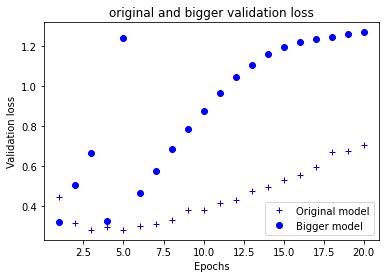

In [9]:
import matplotlib.pyplot as plt

original_val_loss_values=original_history_dict['val_loss']
bigger_val_loss_values=bigger_history_dict['val_loss']

epochs=range(1,len(original_val_loss_values)+1)

plt.plot(epochs,original_val_loss_values,'b+',label='Original model')
plt.plot(epochs,bigger_val_loss_values,'bo',label='Bigger model')
plt.title('original and bigger validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

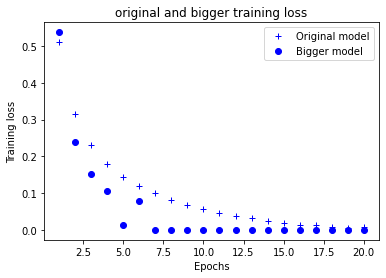

In [10]:
import matplotlib.pyplot as plt

original_val_loss_values=original_history_dict['loss']
bigger_val_loss_values=bigger_history_dict['loss']

epochs=range(1,len(original_val_loss_values)+1)

plt.plot(epochs,original_val_loss_values,'b+',label='Original model')
plt.plot(epochs,bigger_val_loss_values,'bo',label='Bigger model')
plt.title('original and bigger training loss')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [11]:
from keras import regularizers

model=models.Sequential()
model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

l2_regularized_history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

l2_regularized_history_dict=l2_regularized_history.history

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.5341 - accuracy: 0.7853 - val_loss: 0.4033 - val_accuracy: 0.8738
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3367 - accuracy: 0.9037 - val_loss: 0.3441 - val_accuracy: 0.8859
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2744 - accuracy: 0.9237 - val_loss: 0.3345 - val_accuracy: 0.8846
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2407 - accuracy: 0.9365 - val_loss: 0.3283 - val_accuracy: 0.8858
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2191 - accuracy: 0.9439 - val_loss: 0.3314 - val_accuracy: 0.8852
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2041 - accuracy: 0.9489 - val_loss: 0.3446 - val_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1957 - accuracy: 0.9533 - val_loss: 0.3492 - val_accuracy: 0.8823
Epoch 8/20
30

limit_output extension: Maximum message size of 10000 exceeded with 10143 characters

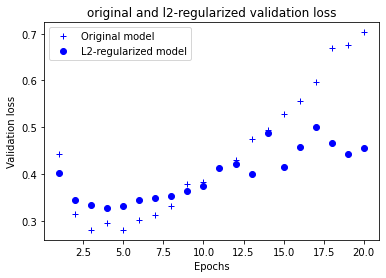

In [12]:
import matplotlib.pyplot as plt

original_val_loss_values=original_history_dict['val_loss']
l2_regularized_val_loss_values=l2_regularized_history_dict['val_loss']

epochs=range(1,len(original_val_loss_values)+1)

plt.plot(epochs,original_val_loss_values,'b+',label='Original model')
plt.plot(epochs,l2_regularized_val_loss_values,'bo',label='L2-regularized model')
plt.title('original and l2-regularized validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [13]:
from keras import regularizers

model=models.Sequential()
model.add(layers.Dense(16,kernel_regularizer=regularizers.l1(0.001),activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,kernel_regularizer=regularizers.l1(0.001),activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

l1_regularized_history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

l1_regularized_history_dict=l1_regularized_history.history

Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 1.0788 - accuracy: 0.7281 - val_loss: 0.7156 - val_accuracy: 0.8211
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6700 - accuracy: 0.8366 - val_loss: 0.6738 - val_accuracy: 0.8236
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6199 - accuracy: 0.8535 - val_loss: 0.6243 - val_accuracy: 0.8484
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6007 - accuracy: 0.8545 - val_loss: 0.6005 - val_accuracy: 0.8552
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5746 - accuracy: 0.8642 - val_loss: 0.5835 - val_accuracy: 0.8590
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5623 - accuracy: 0.8662 - val_loss: 0.5819 - val_accuracy: 0.8575
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5520 - accuracy: 0.8696 - val_loss: 0.5784 - val_accuracy: 0.8552
Epoch 8/20
30

limit_output extension: Maximum message size of 10000 exceeded with 10143 characters

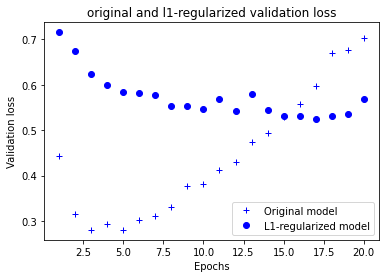

In [14]:
import matplotlib.pyplot as plt

original_val_loss_values=original_history_dict['val_loss']
l1_regularized_val_loss_values=l1_regularized_history_dict['val_loss']

epochs=range(1,len(original_val_loss_values)+1)

plt.plot(epochs,original_val_loss_values,'b+',label='Original model')
plt.plot(epochs,l1_regularized_val_loss_values,'bo',label='L1-regularized model')
plt.title('original and l1-regularized validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [17]:
from keras import regularizers

model=models.Sequential()
model.add(layers.Dense(16,kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

l1_l2_regularized_history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

l1_l2_regularized_history_dict=l1_l2_regularized_history.history

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 1.0885 - accuracy: 0.7363 - val_loss: 0.7249 - val_accuracy: 0.8212
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6759 - accuracy: 0.8416 - val_loss: 0.6893 - val_accuracy: 0.8004
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.6247 - accuracy: 0.8535 - val_loss: 0.6136 - val_accuracy: 0.8571
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5898 - accuracy: 0.8638 - val_loss: 0.5922 - val_accuracy: 0.8600
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5721 - accuracy: 0.8643 - val_loss: 0.5935 - val_accuracy: 0.8523
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5547 - accuracy: 0.8693 - val_loss: 0.5943 - val_accuracy: 0.8441
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5479 - accuracy: 0.8731 - val_loss: 0.5996 - val_accuracy: 0.8410
Epoch 8/20
30

limit_output extension: Maximum message size of 10000 exceeded with 10143 characters

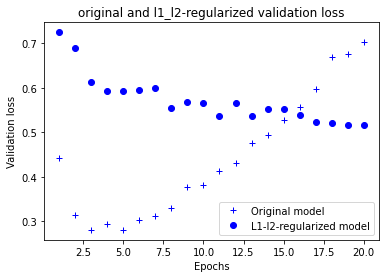

In [18]:
import matplotlib.pyplot as plt

original_val_loss_values=original_history_dict['val_loss']
l1_l2_regularized_val_loss_values=l1_l2_regularized_history_dict['val_loss']

epochs=range(1,len(original_val_loss_values)+1)

plt.plot(epochs,original_val_loss_values,'b+',label='Original model')
plt.plot(epochs,l1_l2_regularized_val_loss_values,'bo',label='L1-l2-regularized model')
plt.title('original and l1_l2-regularized validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [19]:
# 原始模型
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

dropout_history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))
dropout_history_dict=dropout_history.history

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.6350 - accuracy: 0.6366 - val_loss: 0.5520 - val_accuracy: 0.8158
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.5324 - accuracy: 0.7531 - val_loss: 0.4529 - val_accuracy: 0.8522
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.4511 - accuracy: 0.8103 - val_loss: 0.3619 - val_accuracy: 0.8817
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3854 - accuracy: 0.8493 - val_loss: 0.3148 - val_accuracy: 0.8863
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3342 - accuracy: 0.8775 - val_loss: 0.3001 - val_accuracy: 0.8824
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2866 - accuracy: 0.8995 - val_loss: 0.2783 - val_accuracy: 0.8884
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2567 - accuracy: 0.9135 - val_loss: 0.2693 - val_accuracy: 0.8927
Epoch 8/20
30

limit_output extension: Maximum message size of 10000 exceeded with 10143 characters

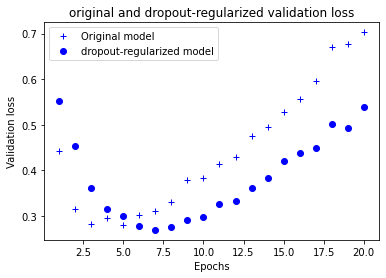

In [22]:
import matplotlib.pyplot as plt

original_val_loss_values=original_history_dict['val_loss']
dropout_val_loss_values=dropout_history_dict['val_loss']

epochs=range(1,len(original_val_loss_values)+1)

plt.plot(epochs,original_val_loss_values,'b+',label='Original model')
plt.plot(epochs,dropout_val_loss_values,'bo',label='dropout-regularized model')
plt.title('original and dropout-regularized validation loss')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()